<a href="https://colab.research.google.com/github/Value1965/mkb10/blob/main/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Подключение к Google Disk

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Загрузка адм-тер деления Калиниградской области

In [96]:
#  Обработка данных адм-тер деления Калиниградской области
fname = "/content/drive/MyDrive/hacks_ai_2022/Тула/Калининград.txt"


with open(fname, "r",encoding='cp1251') as f:
    cities = f.readlines()
# you may also want to remove whitespace characters like '\n' at the end of each line
cities = [x.strip() for x in cities] 

In [97]:
for i in range(len(cities)-1,0,-1):
  cities[i]=cities[i].replace('ё','е')
  if cities[i].find('Список')>-1:
    cities.pop(i)
    #print(i)

  if cities[i].find('Не являются')>-1:
    cities.pop(i)
  if cities[i].isspace():
    cities.pop(i)  
  if len(cities[i])==0:
    cities.pop(i)  

In [98]:
city_dict={}
district =''
for i in range(len(cities)):
  if cities[i].find('№')>-1:
    district=cities[i-1]
    k=district.find('(')
    if k> -1:
      district=district[:k-1]
    #print(district)
  s=cities[i]
  
  if s[0].isdigit():
    city_data=s.split('\t')
    if city_data[2]=='посёлок[7]':
      city_data[2]=='посёлок'

   # print(city_data)
    city_dict[city_data[1]]=[district,city_data[2],city_data[3]]


      

In [99]:
#city_dict

## Загрузка mkb10

In [100]:
fname = "/content/drive/MyDrive/hacks_ai_2022/Тула/mkb10.txt"


with open(fname, "r",encoding='cp1251') as f:
    diseases = f.readlines()
    diseases.pop(0)
    diseases.pop(0)
    diseases.pop(0)
    diseases.pop(0)

In [101]:
#diseases

In [102]:
diseases_dict={}
for disease in diseases:
  #disease=disease.strip()
  l=disease.split('\t')
  diseases_dict[l[0]] = [l[1],l[2].strip().replace('\n','').replace('NULL',''),0]

In [103]:
#diseases_dict

In [104]:
for key in diseases_dict.keys():
  i=0
  key1=key
  #print(key1)
  while (diseases_dict[key1][1] != ''):# & (diseases_dict[key1][1] is not None):
    i=i+1
    if (diseases_dict[key1][1] == 'NULL'):
      #key1=key1[:3]
      i=0
      diseases_dict[key1][1]=''
      break
    key1=diseases_dict[key1][1]
    #print(key1)
  diseases_dict[key][2]=i

for key in diseases_dict.keys():
  if diseases_dict[key][2]==1:
    print(key,' ',diseases_dict[key])

A00-A09   ['Кишечные инфекции', 'A00-B99', 1]
A15-A19   ['Туберкулез', 'A00-B99', 1]
A20-A28   ['Некоторые бактериальные зоонозы', 'A00-B99', 1]
A30-A49   ['Другие бактериальные болезни', 'A00-B99', 1]
A50-A64   ['Инфекции, передающиеся преимущественно половым путем', 'A00-B99', 1]
A65-A69   ['Другие болезни, вызываемые спирохетами', 'A00-B99', 1]
A70-A74   ['Другие болезни, вызываемые хламидиями', 'A00-B99', 1]
A75-A79   ['Риккетсиозы', 'A00-B99', 1]
A80-A89   ['Вирусные инфекции центральной нервной системы', 'A00-B99', 1]
A90-A99   ['Вирусные лихорадки, передаваемые членистоногими, и вирусные геморрагические лихорадки', 'A00-B99', 1]
B00-B09   ['Вирусные инфекции, характеризующиеся поражениями кожи и слизистых оболочек', 'A00-B99', 1]
B15-B19   ['Вирусный гепатит', 'A00-B99', 1]
B20-B24   ['Болезнь, вызванная вирусом иммунодефицита человека [вич]', 'A00-B99', 1]
B25-B34   ['Другие вирусные болезни', 'A00-B99', 1]
B35-B49   ['Микозы', 'A00-B99', 1]
B50-B64   ['Протозойные болезни', 'A

In [105]:
for key in diseases_dict.keys():
  
  key1=key
  
  while (diseases_dict[key1][2] >1):# & (diseases_dict[key1][1] is not None):
    
    key1=diseases_dict[key1][1]
    #print(key1)
  diseases_dict[key].append(key1)

diseases_dict

{'A00-B99': ['Некоторые инфекционные и паразитарные болезни',
  '',
  0,
  'A00-B99'],
 'A00-A09': ['Кишечные инфекции', 'A00-B99', 1, 'A00-A09'],
 'A00': ['Холера', 'A00-A09', 2, 'A00-A09'],
 'A00.0': ['Холера, вызванная холерным вибрионом 01, биовар cholerae',
  'A00',
  3,
  'A00-A09'],
 'A00.1': ['Холера, вызванная холерным вибрионом 01, биовар eltor',
  'A00',
  3,
  'A00-A09'],
 'A00.9': ['Холера неуточненная', 'A00', 3, 'A00-A09'],
 'A01': ['Тиф и паратиф', 'A00-A09', 2, 'A00-A09'],
 'A01.0': ['Брюшной тиф', 'A01', 3, 'A00-A09'],
 'A01.1': ['Паратиф A', 'A01', 3, 'A00-A09'],
 'A01.2': ['Паратиф B', 'A01', 3, 'A00-A09'],
 'A01.3': ['Паратиф C', 'A01', 3, 'A00-A09'],
 'A01.4': ['Паратиф неуточненный', 'A01', 3, 'A00-A09'],
 'A02': ['Другие сальмонеллезные инфекции', 'A00-A09', 2, 'A00-A09'],
 'A02.0': ['Сальмонеллезный энтерит', 'A02', 3, 'A00-A09'],
 'A02.1': ['Сальмонеллезная септицемия', 'A02', 3, 'A00-A09'],
 'A02.2+': ['Локализованная сальмонеллезная инфекция', 'A02', 3, 'A00

## Загрузка библиотек

In [106]:
#Установка catboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
#import необходимых модулей

import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Загрузка датасетов

In [108]:
!cp /content/drive/MyDrive/Colab/Data/'Готовые задачи'/Калининград/participants/train/train.csv ./ 
!cp /content/drive/MyDrive/Colab/Data/'Готовые задачи'/Калининград/participants/test/test.csv ./ 

In [109]:
#Считывание данных в DataFrame 

train = pd.read_csv('train.csv', sep=';', index_col=None, dtype={'PATIENT_SEX':str, 'MKB_CODE':str, 'ADRES':str, 'VISIT_MONTH_YEAR':str, 'AGE_CATEGORY':str, 'PATIENT_ID_COUNT':int})
test = pd.read_csv('test.csv', sep=';', index_col=None, dtype={'PATIENT_SEX':str, 'MKB_CODE':str, 'ADRES':str, 'VISIT_MONTH_YEAR':str, 'AGE_CATEGORY':str})

In [110]:
#(
#    test
#    .merge(
#        (
#        train[train['VISIT_MONTH_YEAR'].isin(['01.22', '02.22', '03.22'])]
#        .groupby(['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY'], as_index=False)
#        ['PATIENT_ID_COUNT']
#        .mean()
#    ),
#        on=['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY'],
#        how='left'
#    )
#    .fillna(1)
#    .astype({'PATIENT_ID_COUNT': int})
#    .to_csv('baseline_3m.csv', sep=';', index=None)
#)

## Работа с датасетом train


In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212393 entries, 0 to 2212392
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   PATIENT_SEX       object
 1   MKB_CODE          object
 2   ADRES             object
 3   VISIT_MONTH_YEAR  object
 4   AGE_CATEGORY      object
 5   PATIENT_ID_COUNT  int64 
dtypes: int64(1), object(5)
memory usage: 101.3+ MB


In [112]:
train.insert(3, "VISIT_MY", train['VISIT_MONTH_YEAR'])

def get_my(s):
  return int(s.split('.')[1])*12+int(s.split('.')[0])

train['VISIT_MY'] = train['VISIT_MY'].apply(get_my)

train = train.drop(['VISIT_MONTH_YEAR'], axis = 1)

In [113]:
train = train.sort_values(by=['PATIENT_SEX','MKB_CODE','ADRES','AGE_CATEGORY','VISIT_MY'])

In [114]:
train.head(10)

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MY,AGE_CATEGORY,PATIENT_ID_COUNT
2,0,A00,Гусев,231,children,1
4,0,A00,Калининград,218,children,1
11,0,A00,Калининград,238,children,1
3,0,A00,Калининград,265,children,1
5,0,A00,Калининград,267,children,4
12,0,A00,Калининград,264,elderly,1
6,0,A00,Калининград,267,elderly,1
7,0,A00,Калининград,267,middleage,1
10,0,A00,Калининград,261,old,1
9,0,A00,Калининград,223,young,1


In [115]:
train_max=train.groupby(['PATIENT_SEX',	'MKB_CODE',	'ADRES','AGE_CATEGORY'],as_index=False).agg({'PATIENT_ID_COUNT': 'max' })
train_min=train.groupby(['PATIENT_SEX',	'MKB_CODE',	'ADRES','AGE_CATEGORY'],as_index=False).agg({'PATIENT_ID_COUNT': 'min' })

def get_next_my(s):
  return int(s+1)

def get_month(s):
  return s%12

def get_year(s):
  return s//12

train_list=[]
train_list.append(train)
nm=7
for i in range(1,nm):
  train_copy=train_list[i-1].copy()
  train_copy['VISIT_MY']=train_copy['VISIT_MY'].apply(get_next_my)
  train_list.append(train_copy)

#train_2=train_1.copy()
#train_2['VISIT_MY']=train_2['VISIT_MY'].apply(get_next_my)
#train_3=train_2.copy()
#train_3['VISIT_MY']=train_3['VISIT_MY'].apply(get_next_my)

train_max.head(20)

,PATIENT_SEX,MKB_CODE,ADRES,AGE_CATEGORY,PATIENT_ID_COUNT
0,0,A00,Гусев,children,1
1,0,A00,Калининград,children,4
2,0,A00,Калининград,elderly,1
3,0,A00,Калининград,middleage,1
4,0,A00,Калининград,old,1
5,0,A00,Калининград,young,3
6,0,A00,Нестеров,middleage,1
7,0,A00,Партизанское,young,1
8,0,A00,Садовое,children,1
9,0,A00,Славск,elderly,1


In [116]:
train.head(20)

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MY,AGE_CATEGORY,PATIENT_ID_COUNT
2,0,A00,Гусев,231,children,1
4,0,A00,Калининград,218,children,1
11,0,A00,Калининград,238,children,1
3,0,A00,Калининград,265,children,1
5,0,A00,Калининград,267,children,4
12,0,A00,Калининград,264,elderly,1
6,0,A00,Калининград,267,elderly,1
7,0,A00,Калининград,267,middleage,1
10,0,A00,Калининград,261,old,1
9,0,A00,Калининград,223,young,1


In [117]:
train=train.reset_index().merge(train_max,how='left',on=['PATIENT_SEX',	'MKB_CODE',	'ADRES','AGE_CATEGORY']).set_index('index')
train.rename(columns = {'PATIENT_ID_COUNT_x' : 'PATIENT_ID_COUNT', 'PATIENT_ID_COUNT_y' : 'PATIENT_ID_COUNT_max'}, inplace = True) 

train=train.reset_index().merge(train_min,how='left',on=['PATIENT_SEX',	'MKB_CODE',	'ADRES','AGE_CATEGORY']).set_index('index')
train.rename(columns = {'PATIENT_ID_COUNT_x' : 'PATIENT_ID_COUNT', 'PATIENT_ID_COUNT_y' : 'PATIENT_ID_COUNT_min'}, inplace = True) 

train.info()

#nm=7 # Количество месяцев ретроспекци
for i in range(1,nm):
  train=train.reset_index().merge(train_list[i],how='left',on=['VISIT_MY','PATIENT_SEX',	'MKB_CODE',	'ADRES',	'AGE_CATEGORY']).set_index('index')
  new_column_name='PATIENT_ID_COUNT_'+str(i)
  train.rename(columns = {'PATIENT_ID_COUNT_x' : 'PATIENT_ID_COUNT', 'PATIENT_ID_COUNT_y' : new_column_name}, inplace = True) # ,'VISIT_MONTH_YEAR_x' : 'VISIT_MONTH_YEAR' 


##train = train.drop(['VISIT_MONTH_YEAR_y'], axis = 1)

#train.info()
#train=train.reset_index().merge(train_2,how='left',on=['VISIT_MY','PATIENT_SEX',	'MKB_CODE',	'ADRES',	'AGE_CATEGORY']).set_index('index')
#train.rename(columns = {'PATIENT_ID_COUNT_x' : 'PATIENT_ID_COUNT', 'PATIENT_ID_COUNT_y' : 'PATIENT_ID_COUNT_2'}, inplace = True) # ,'VISIT_MONTH_YEAR_x' : 'VISIT_MONTH_YEAR'
##train = train.drop(['VISIT_MONTH_YEAR_y'], axis = 1)
#train.info()

#train=train.reset_index().merge(train_3,how='left',on=['VISIT_MY','PATIENT_SEX',	'MKB_CODE',	'ADRES',	'AGE_CATEGORY']).set_index('index')
#train.rename(columns = {'PATIENT_ID_COUNT_x' : 'PATIENT_ID_COUNT', 'PATIENT_ID_COUNT_y' : 'PATIENT_ID_COUNT_3'}, inplace = True) # ,'VISIT_MONTH_YEAR_x' : 'VISIT_MONTH_YEAR'
##train = train.drop(['VISIT_MONTH_YEAR_y'], axis = 1)

train=train.fillna(0)
for i in range(1,nm):
  new_column_name='PATIENT_ID_COUNT_'+str(i)
  train[new_column_name] = train[new_column_name].astype(int)

#train['PATIENT_ID_COUNT_2'] = train['PATIENT_ID_COUNT_2'].astype(int)
#train['PATIENT_ID_COUNT_3'] = train['PATIENT_ID_COUNT_3'].astype(int)

train['PATIENT_ID_COUNT_3'] = (train['PATIENT_ID_COUNT_3']+train['PATIENT_ID_COUNT_2']+train['PATIENT_ID_COUNT_1'])/3
train['PATIENT_ID_COUNT_2'] = (train['PATIENT_ID_COUNT_2']+train['PATIENT_ID_COUNT_1'])/2

train.info()


train.head(30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212393 entries, 2 to 2212392
Data columns (total 8 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   PATIENT_SEX           object
 1   MKB_CODE              object
 2   ADRES                 object
 3   VISIT_MY              int64 
 4   AGE_CATEGORY          object
 5   PATIENT_ID_COUNT      int64 
 6   PATIENT_ID_COUNT_max  int64 
 7   PATIENT_ID_COUNT_min  int64 
dtypes: int64(4), object(4)
memory usage: 151.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212393 entries, 2 to 2212392
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   PATIENT_SEX           object 
 1   MKB_CODE              object 
 2   ADRES                 object 
 3   VISIT_MY              int64  
 4   AGE_CATEGORY          object 
 5   PATIENT_ID_COUNT      int64  
 6   PATIENT_ID_COUNT_max  int64  
 7   PATIENT_ID_COUNT_min  int64  
 8   PATIENT_ID_COUNT_1    int64 

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MY,AGE_CATEGORY,PATIENT_ID_COUNT,PATIENT_ID_COUNT_max,PATIENT_ID_COUNT_min,PATIENT_ID_COUNT_1,PATIENT_ID_COUNT_2,PATIENT_ID_COUNT_3,PATIENT_ID_COUNT_4,PATIENT_ID_COUNT_5,PATIENT_ID_COUNT_6
index,,,,,,,,,,,,,,
2,0,A00,Гусев,231,children,1,1,1,0,0.0,0.000000,0,0,0
4,0,A00,Калининград,218,children,1,4,1,0,0.0,0.000000,0,0,0
11,0,A00,Калининград,238,children,1,4,1,0,0.0,0.000000,0,0,0
3,0,A00,Калининград,265,children,1,4,1,0,0.0,0.000000,0,0,0
5,0,A00,Калининград,267,children,4,4,1,0,0.5,0.333333,0,0,0
12,0,A00,Калининград,264,elderly,1,1,1,0,0.0,0.000000,0,0,0
6,0,A00,Калининград,267,elderly,1,1,1,0,0.0,0.333333,0,0,0
7,0,A00,Калининград,267,middleage,1,1,1,0,0.0,0.000000,0,0,0
10,0,A00,Калининград,261,old,1,1,1,0,0.0,0.000000,0,0,0


In [118]:
train.insert(3, "VISIT_MONTH", train["VISIT_MY"])
train['VISIT_MONTH'] = train['VISIT_MONTH'].apply(get_month)

#train_sum_month=train[train['VISIT_MY']<265].groupby(['VISIT_MONTH','PATIENT_SEX',	'MKB_CODE',	'ADRES','AGE_CATEGORY'],as_index=False).agg(
#    {'PATIENT_ID_COUNT': ['sum','mean','min','max']}
#    )
train_month=train[train['VISIT_MY']<265].groupby(['VISIT_MONTH','PATIENT_SEX',	'MKB_CODE',	'ADRES','AGE_CATEGORY'],as_index=False).agg(
    meanMonthCount = pd.NamedAgg(column = 'PATIENT_ID_COUNT', aggfunc = 'mean'),
    maxMonthCount = pd.NamedAgg(column = 'PATIENT_ID_COUNT', aggfunc = 'max'),
    minMonthCount = pd.NamedAgg(column = 'PATIENT_ID_COUNT', aggfunc = 'min'),
    stdMonthCount = pd.NamedAgg(column = 'PATIENT_ID_COUNT', aggfunc = 'std'),
)

train_month.insert(9,'std2MonthCount',train_month['meanMonthCount']+train_month['stdMonthCount'])
train_month.insert(9,'std1MonthCount',train_month['meanMonthCount']-train_month['stdMonthCount'])
#def get_quota(s):
#  return s/4

#train_sum_month['PATIENT_ID_COUNT']=train_sum_month['PATIENT_ID_COUNT'].apply(get_quota)

train=train.reset_index().merge(train_month,how='left',on=['VISIT_MONTH','PATIENT_SEX',	'MKB_CODE',	'ADRES','AGE_CATEGORY']).set_index('index')
#train.rename(columns = {'PATIENT_ID_COUNT_x' : 'PATIENT_ID_COUNT', 'PATIENT_ID_COUNT_y' : 'PATIENT_ID_COUNT_sum_month'}, inplace = True) 

train=train.fillna(0)

In [119]:
train = train.sort_values(by='VISIT_MY')
train

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH,VISIT_MY,AGE_CATEGORY,PATIENT_ID_COUNT,PATIENT_ID_COUNT_max,PATIENT_ID_COUNT_min,PATIENT_ID_COUNT_1,...,PATIENT_ID_COUNT_3,PATIENT_ID_COUNT_4,PATIENT_ID_COUNT_5,PATIENT_ID_COUNT_6,meanMonthCount,maxMonthCount,minMonthCount,stdMonthCount,std1MonthCount,std2MonthCount
index,,,,,,,,,,,,,,,,,,,,,
325440,0,H40.4,Гурьевск,1,217,old,1,1,1,0,...,0.000000,0,0,0,1.000000,1.0,1.0,0.000000,0.000000,0.000000
2173760,1,Z04.9,Сосновка,1,217,young,2,2,1,0,...,0.000000,0,0,0,2.000000,2.0,2.0,0.000000,0.000000,0.000000
1932829,1,M70.4,Гусев,1,217,middleage,1,1,1,0,...,0.000000,0,0,0,1.000000,1.0,1.0,0.000000,0.000000,0.000000
969188,0,N81.8,Ясная Поляна,1,217,elderly,3,3,1,0,...,0.000000,0,0,0,3.000000,3.0,3.0,0.000000,0.000000,0.000000
1008754,0,N95.2,Мамоново,1,217,middleage,3,11,1,0,...,0.000000,0,0,0,3.250000,5.0,2.0,1.258306,1.991694,4.508306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315632,0,Z96.1,Калининград,3,267,children,1,2,1,1,...,0.333333,1,0,0,1.000000,1.0,1.0,0.000000,0.000000,0.000000
713173,0,L21.8,Калининград,3,267,young,11,21,1,7,...,4.666667,11,9,12,14.500000,21.0,10.0,4.654747,9.845253,19.154747
2101065,1,T29.2,Калининград,3,267,middleage,3,4,1,0,...,0.000000,0,1,2,2.500000,4.0,1.0,2.121320,0.378680,4.621320


In [120]:
train.insert(6,"DISTRICT", train['ADRES'])
train.insert(7,"ADRES_TYPE", train['ADRES'])
train.insert(8,"POPULATION", train['ADRES'])
train.insert(2,"MKB_CLASS", train['MKB_CODE'])


In [121]:
def get_district(s):
  d=city_dict.get(s,['Калининград'])
  return d[0]

def get_type(s):
  d=city_dict.get(s,['Калининград','СТ'])
  return d[1]

def get_population(s):
  d=city_dict.get(s,['Калининград','СТ','1000'])
  return int(d[2].replace(' ',''))

def get_mkb_class(s):
  d=diseases_dict.get(s)
  return d[3].replace(' ','')

train["DISTRICT"]=train["DISTRICT"].apply(get_district)
train["ADRES_TYPE"]=train["ADRES_TYPE"].apply(get_type)
train["POPULATION"]=train["POPULATION"].apply(get_population)
train["MKB_CLASS"]=train["MKB_CLASS"].apply(get_mkb_class)

In [122]:
#Новодорожный
#train = train.loc[~train['ADRES'].isin(['Новодорожный','Калиниградская','СТ Радуга','СТ Железнодорожник','СТ Искра ул. Тюльпановая',
# 'СТ Колосок',
# 'СТ Победа',
# 'СТ Чайка'])]


train = train.loc[train['ADRES_TYPE']=='город']
train['ADRES'].value_counts()

Калининград       617129
Гурьевск          116111
Светлый            85748
Пионерский         84932
Советск            78466
Зеленоградск       77494
Гусев              75724
Балтийск           75151
Черняховск         63899
Гвардейск          63529
Полесск            46774
Правдинск          43880
Неман              41249
Светлогорск        39497
Багратионовск      37678
Мамоново           33506
Озерск             32513
Славск             30490
Нестеров           28560
Краснознаменск     15474
Ладушкин           14031
Приморск            5544
Name: ADRES, dtype: int64

In [123]:
#Новодорожный
#Калиниградская
#СТ
train.loc[train['ADRES']=='Прибрежный', 'ADRES'] = 'Прибрежное'
train.loc[train['ADRES']=='Знаменск', 'ADRES'] = 'Знаменское'
train.loc[train['ADRES']=='Гурьевский', 'ADRES'] = 'Ново-Гурьевское'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [124]:
##train=train.groupby(['VISIT_MY','PATIENT_SEX', 'MKB_CODE', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY','DISTRICT','ADRES_TYPE'],as_index=False).agg({'POPULATION': 'sum', 'PATIENT_ID_COUNT': 'sum' })
#train=train.groupby(['VISIT_MY','PATIENT_SEX',	'MKB_CODE',	'MKB_CLASS','DISTRICT',	'ADRES_TYPE',	'AGE_CATEGORY'],as_index=False).agg({'POPULATION': 'sum', 'PATIENT_ID_COUNT': 'sum' ,'PATIENT_ID_COUNT_max': 'sum','PATIENT_ID_COUNT_1': 'sum','PATIENT_ID_COUNT_2': 'sum','PATIENT_ID_COUNT_3': 'sum'})
##train=train.groupby(['VISIT_MY','PATIENT_SEX',	'MKB_CODE',	'DISTRICT',	'VISIT_MONTH_YEAR',	'AGE_CATEGORY'],as_index=False).agg({'POPULATION': 'sum', 'PATIENT_ID_COUNT': 'sum' })
#train=train.groupby(['VISIT_MY','PATIENT_SEX',	'MKB_CODE',	'MKB_CLASS','DISTRICT',	'AGE_CATEGORY'],as_index=False).agg({'POPULATION': 'sum', 'PATIENT_ID_COUNT': 'sum' ,'PATIENT_ID_COUNT_max': 'max','PATIENT_ID_COUNT_min': 'min','meanMonthCount': 'sum','stdMonthCount': 'sum','std1MonthCount': 'sum','std2MonthCount': 'sum','maxMonthCount': 'max','minMonthCount': 'min','PATIENT_ID_COUNT_1': 'sum'})
#train=train.groupby(['VISIT_MY','PATIENT_SEX',	'MKB_CODE',	'MKB_CLASS','DISTRICT',	'AGE_CATEGORY'],as_index=False).agg({'POPULATION': 'sum', 'PATIENT_ID_COUNT': 'sum' ,'PATIENT_ID_COUNT_max': 'max','PATIENT_ID_COUNT_min': 'min','meanMonthCount': 'sum','stdMonthCount': 'sum','std1MonthCount': 'sum','std2MonthCount': 'sum','maxMonthCount': 'max','minMonthCount': 'min','PATIENT_ID_COUNT_1': 'sum','PATIENT_ID_COUNT_2': 'sum','PATIENT_ID_COUNT_3': 'sum','PATIENT_ID_COUNT_4': 'sum'})
#train=train.groupby(['VISIT_MY','PATIENT_SEX',	'MKB_CODE',	'MKB_CLASS','DISTRICT',	'AGE_CATEGORY'],as_index=False).agg({'POPULATION': 'sum', 'PATIENT_ID_COUNT': 'sum' ,'PATIENT_ID_COUNT_max': 'max','PATIENT_ID_COUNT_min': 'min','meanMonthCount': 'sum','stdMonthCount': 'sum','std1MonthCount': 'sum','std2MonthCount': 'sum','maxMonthCount': 'max','minMonthCount': 'min','PATIENT_ID_COUNT_1': 'sum','PATIENT_ID_COUNT_2': 'sum'})

## Сейчас это
#train=train.groupby(['VISIT_MY','PATIENT_SEX',	'MKB_CODE',	'MKB_CLASS','DISTRICT',	'AGE_CATEGORY'],as_index=False).agg({'POPULATION': 'sum', 'PATIENT_ID_COUNT': 'sum' ,'PATIENT_ID_COUNT_max': 'max','PATIENT_ID_COUNT_min': 'min','meanMonthCount': 'sum','stdMonthCount': 'sum','std1MonthCount': 'sum','std2MonthCount': 'sum','maxMonthCount': 'max','minMonthCount': 'min','PATIENT_ID_COUNT_1': 'sum','PATIENT_ID_COUNT_2': 'sum','PATIENT_ID_COUNT_3': 'sum'})
#train=train.groupby(['VISIT_MY','PATIENT_SEX',	'MKB_CODE',	'MKB_CLASS','DISTRICT',	'AGE_CATEGORY'],as_index=False).agg({'POPULATION': 'sum', 'PATIENT_ID_COUNT': 'sum' ,'PATIENT_ID_COUNT_max': 'max','PATIENT_ID_COUNT_min': 'min','meanMonthCount': 'sum','stdMonthCount': 'sum','std1MonthCount': 'sum','std2MonthCount': 'sum','maxMonthCount': 'max','minMonthCount': 'min','PATIENT_ID_COUNT_1': 'sum','PATIENT_ID_COUNT_2': 'sum','PATIENT_ID_COUNT_3': 'sum','PATIENT_ID_COUNT_4': 'sum','PATIENT_ID_COUNT_5': 'sum','PATIENT_ID_COUNT_6': 'sum'})
#train=train.groupby(['VISIT_MY','PATIENT_SEX',	'MKB_CODE',	'MKB_CLASS','ADRES_TYPE','DISTRICT',	'AGE_CATEGORY'],as_index=False).agg({'POPULATION': 'sum', 'PATIENT_ID_COUNT': 'sum' ,'PATIENT_ID_COUNT_max': 'max','PATIENT_ID_COUNT_min': 'min','PATIENT_ID_COUNT_sum_month': 'sum','PATIENT_ID_COUNT_1': 'sum','PATIENT_ID_COUNT_2': 'sum','PATIENT_ID_COUNT_3': 'sum'})

In [125]:
#train_list[2]


## Просмотр датасетов

In [126]:
train.isna().sum()

PATIENT_SEX             0
MKB_CODE                0
MKB_CLASS               0
ADRES                   0
VISIT_MONTH             0
VISIT_MY                0
AGE_CATEGORY            0
DISTRICT                0
ADRES_TYPE              0
POPULATION              0
PATIENT_ID_COUNT        0
PATIENT_ID_COUNT_max    0
PATIENT_ID_COUNT_min    0
PATIENT_ID_COUNT_1      0
PATIENT_ID_COUNT_2      0
PATIENT_ID_COUNT_3      0
PATIENT_ID_COUNT_4      0
PATIENT_ID_COUNT_5      0
PATIENT_ID_COUNT_6      0
meanMonthCount          0
maxMonthCount           0
minMonthCount           0
stdMonthCount           0
std1MonthCount          0
std2MonthCount          0
dtype: int64

In [127]:
train['MKB_CODE'].value_counts()

J06.9    9407
I11.9    8838
Z00.0    7793
Z02.7    6908
M42.1    6766
         ... 
L87.2       1
S35.2       1
F66.1       1
Z82.6       1
Z95.9       1
Name: MKB_CODE, Length: 7570, dtype: int64

In [128]:
train['MKB_CLASS'].value_counts()

Z00-Z13    90727
M00-M25    72109
C00-C97    72086
M40-M54    64959
D10-D36    57895
           ...  
F99-F99       11
Y10-Y34       10
Y35-Y36        8
A75-A79        4
P70-P74        2
Name: MKB_CLASS, Length: 210, dtype: int64

In [129]:
test['MKB_CODE'].value_counts()

J06.9    209
Z25.8    194
I11.9    178
Z00.0    176
Z02.7    152
        ... 
G57.3      1
G56.4      1
G54.9      1
G54.6      1
Z96.7      1
Name: MKB_CODE, Length: 4106, dtype: int64

In [130]:
#test['MKB_CLASS'].value_counts()

In [131]:
#train['ADRES'].value_counts()

In [132]:
test['ADRES'].value_counts()

Калининград       13729
Гурьевск           2898
Пионерский         2346
Черняховск         2254
Светлый            1958
Гусев              1820
Советск            1694
Зеленоградск       1671
Гвардейск          1370
Балтийск           1362
Правдинск          1255
Неман              1119
Багратионовск      1074
Полесск            1046
Славск              925
Озерск              895
Нестеров            734
Мамоново            729
Краснознаменск      474
Светлогорск          20
Name: ADRES, dtype: int64

In [133]:
for k in test['ADRES'].value_counts().keys():
  print(k,' ',city_dict[k])

Калининград   ['Калининград', 'город', '493 256']
Гурьевск   ['Гурьевский', 'город', '19 670']
Пионерский   ['Пионерский', 'город', '12 573']
Черняховск   ['Черняховский', 'город', '35 375']
Светлый   ['Светлый', 'город', '21 441']
Гусев   ['Гусевский', 'город', '28 177']
Советск   ['Советск', 'город', '38 514']
Зеленоградск   ['Зеленоградский', 'город', '17 296']
Гвардейск   ['Гвардейский', 'город', '13 353']
Балтийск   ['Балтийск', 'город', '33 946']
Правдинск   ['Правдинский', 'город', '4045']
Неман   ['Неманский', 'город', '10 765']
Багратионовск   ['Багратионовский', 'город', '6401']
Полесск   ['Полесский', 'город', '6921']
Славск   ['Славский', 'город', '3964']
Озерск   ['Озерский', 'город', '3816']
Нестеров   ['Нестеровский', 'город', '3937']
Мамоново   ['Мамоново', 'город', '8104']
Краснознаменск   ['Краснознаменский', 'город', '3049']
Светлогорск   ['Светлогорск', 'город', '16 099']


In [134]:
city_set=set(test['ADRES'].value_counts().keys())

In [135]:
MKB_set=set(test['MKB_CODE'].value_counts().keys())
ST_set=set(['СТ Железнодорожник',
 'СТ Искра ул. Тюльпановая',
 'СТ Колосок',
 'СТ Победа',
 'СТ Радуга',
 'СТ Чайка'])

In [136]:
#train.loc[(train['ADRES'].isin(ST_set))]

In [137]:
#train = train.query("ADRES in city_set")
#train = train.loc[(train['ADRES'].isin(city_set))|(train['MKB_CODE'].isin(MKB_set))] #train = train.loc[train['ADRES'].isin(city_set)]

In [138]:
#train['ADRES'].value_counts()

In [139]:
#train = train.loc[train['MKB_CODE'].isin(MKB_set)] 

In [140]:
i=0
for k in train['MKB_CODE'].value_counts().keys():
  print(k,'    ',train['MKB_CODE'].value_counts()[k])
  i=i+1
  if i>20:
    break

J06.9      9407
I11.9      8838
Z00.0      7793
Z02.7      6908
M42.1      6766
J20.9      6167
K04.5      5823
K02.1      5692
Z01.2      5554
I67.8      5451
M54.4      5359
H52.1      5258
J04.1      5212
J02.9      5151
Z00.8      4997
M54.5      4862
K04.0      4847
H61.2      4741
I67.2      4539
Z01.4      4476
J45.8      4338


In [141]:
train['PATIENT_SEX'].value_counts()

0    1008934
1     698445
Name: PATIENT_SEX, dtype: int64

In [142]:
#train['VISIT_MONTH_YEAR'].value_counts()

In [143]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1707379 entries, 325440 to 211394
Data columns (total 25 columns):
 #   Column                Dtype  
---  ------                -----  
 0   PATIENT_SEX           object 
 1   MKB_CODE              object 
 2   MKB_CLASS             object 
 3   ADRES                 object 
 4   VISIT_MONTH           int64  
 5   VISIT_MY              int64  
 6   AGE_CATEGORY          object 
 7   DISTRICT              object 
 8   ADRES_TYPE            object 
 9   POPULATION            int64  
 10  PATIENT_ID_COUNT      int64  
 11  PATIENT_ID_COUNT_max  int64  
 12  PATIENT_ID_COUNT_min  int64  
 13  PATIENT_ID_COUNT_1    int64  
 14  PATIENT_ID_COUNT_2    float64
 15  PATIENT_ID_COUNT_3    float64
 16  PATIENT_ID_COUNT_4    int64  
 17  PATIENT_ID_COUNT_5    int64  
 18  PATIENT_ID_COUNT_6    int64  
 19  meanMonthCount        float64
 20  maxMonthCount         float64
 21  minMonthCount         float64
 22  stdMonthCount         float64
 23  std

In [144]:
train = train.sort_values(by=['PATIENT_SEX','MKB_CODE','DISTRICT','AGE_CATEGORY','VISIT_MY'])

In [145]:
#train.loc[(train['MKB_CODE']=='J06.9')&(train['AGE_CATEGORY']=='children')&(train['ADRES_TYPE']=='город')].head(30)

In [146]:
train = train.sort_values(by=['VISIT_MY'])

## ПОдготовка к сплиту

In [147]:
#Отделение меток от данных
#X = train[['VISIT_MY','PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY','DISTRICT','ADRES_TYPE','POPULATION']]
X_columns=train.columns.values.tolist()
X_columns.remove('PATIENT_ID_COUNT')
#X = train[['VISIT_MY','PATIENT_SEX', 'MKB_CODE', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY','DISTRICT','POPULATION','ADRES_TYPE']]
X = train[X_columns]
y = train[['PATIENT_ID_COUNT']]
#print(X_columns)

In [148]:
X.head(10)

,PATIENT_SEX,MKB_CODE,MKB_CLASS,ADRES,VISIT_MONTH,VISIT_MY,AGE_CATEGORY,DISTRICT,ADRES_TYPE,POPULATION,...,PATIENT_ID_COUNT_3,PATIENT_ID_COUNT_4,PATIENT_ID_COUNT_5,PATIENT_ID_COUNT_6,meanMonthCount,maxMonthCount,minMonthCount,stdMonthCount,std1MonthCount,std2MonthCount
index,,,,,,,,,,,,,,,,,,,,,
254313,0,G58.0,G50-G59,Калининград,1,217,middleage,Калининград,город,493256,...,0.0,0,0,0,8.000000,17.0,2.0,6.976150,1.023850,14.976150
1316081,0,Z96.6,Z80-Z99,Калининград,1,217,elderly,Калининград,город,493256,...,0.0,0,0,0,2.333333,4.0,1.0,1.527525,0.805808,3.860859
1846049,1,L50.9,L50-L54,Калининград,1,217,children,Калининград,город,493256,...,0.0,0,0,0,11.750000,17.0,6.0,5.123475,6.626525,16.873475
737764,0,L50.9,L50-L54,Калининград,1,217,elderly,Калининград,город,493256,...,0.0,0,0,0,4.500000,7.0,3.0,1.914854,2.585146,6.414854
1981887,1,P83.5,P80-P83,Правдинск,1,217,children,Правдинский,город,4045,...,0.0,0,0,0,1.000000,1.0,1.0,0.000000,0.000000,0.000000
586142,0,K02.1,K00-K14,Светлогорск,1,217,middleage,Светлогорск,город,16099,...,0.0,0,0,0,6.666667,12.0,3.0,4.725816,1.940851,11.392482
1550542,1,H65.9,H65-H75,Калининград,1,217,children,Калининград,город,493256,...,0.0,0,0,0,25.250000,48.0,1.0,20.870633,4.379367,46.120633
252930,0,G56.9,G50-G59,Калининград,1,217,middleage,Калининград,город,493256,...,0.0,0,0,0,1.000000,1.0,1.0,0.000000,0.000000,0.000000
1073477,0,R51,R50-R69,Светлогорск,1,217,elderly,Светлогорск,город,16099,...,0.0,0,0,0,1.000000,1.0,1.0,0.000000,0.000000,0.000000


In [149]:
#X.insert(3, "VISIT_MONTH", X["VISIT_MY"])
#X['VISIT_MONTH'] = X['VISIT_MONTH'].apply(get_month)

X.insert(3, "VISIT_YEAR", X["VISIT_MY"])
X['VISIT_YEAR'] = X['VISIT_YEAR'].apply(get_year)




In [150]:

d=X['VISIT_MY'].value_counts(sort=False)
d

217    33074
218    35347
219    35808
220    35201
221    35119
222    34902
223    35328
224    34617
225    33850
226    37623
227    37086
228    35919
229    34164
230    35803
231    37072
232    38670
233    35137
234    34655
235    37053
236    35806
237    36081
238    39281
239    36513
240    37968
241    30550
242    34376
243    34416
244    22893
245    21353
246    29166
247    33073
248    32434
249    35458
250    35684
251    29442
252    28624
253    22959
254    29176
255    34137
256    34922
257    32948
258    34547
259    33806
260    33153
261    34471
262    33057
263    33548
264    34720
265    25743
266    24348
267    36298
Name: VISIT_MY, dtype: int64

In [151]:
X.head(10)

,PATIENT_SEX,MKB_CODE,MKB_CLASS,VISIT_YEAR,ADRES,VISIT_MONTH,VISIT_MY,AGE_CATEGORY,DISTRICT,ADRES_TYPE,...,PATIENT_ID_COUNT_3,PATIENT_ID_COUNT_4,PATIENT_ID_COUNT_5,PATIENT_ID_COUNT_6,meanMonthCount,maxMonthCount,minMonthCount,stdMonthCount,std1MonthCount,std2MonthCount
index,,,,,,,,,,,,,,,,,,,,,
254313,0,G58.0,G50-G59,18,Калининград,1,217,middleage,Калининград,город,...,0.0,0,0,0,8.000000,17.0,2.0,6.976150,1.023850,14.976150
1316081,0,Z96.6,Z80-Z99,18,Калининград,1,217,elderly,Калининград,город,...,0.0,0,0,0,2.333333,4.0,1.0,1.527525,0.805808,3.860859
1846049,1,L50.9,L50-L54,18,Калининград,1,217,children,Калининград,город,...,0.0,0,0,0,11.750000,17.0,6.0,5.123475,6.626525,16.873475
737764,0,L50.9,L50-L54,18,Калининград,1,217,elderly,Калининград,город,...,0.0,0,0,0,4.500000,7.0,3.0,1.914854,2.585146,6.414854
1981887,1,P83.5,P80-P83,18,Правдинск,1,217,children,Правдинский,город,...,0.0,0,0,0,1.000000,1.0,1.0,0.000000,0.000000,0.000000
586142,0,K02.1,K00-K14,18,Светлогорск,1,217,middleage,Светлогорск,город,...,0.0,0,0,0,6.666667,12.0,3.0,4.725816,1.940851,11.392482
1550542,1,H65.9,H65-H75,18,Калининград,1,217,children,Калининград,город,...,0.0,0,0,0,25.250000,48.0,1.0,20.870633,4.379367,46.120633
252930,0,G56.9,G50-G59,18,Калининград,1,217,middleage,Калининград,город,...,0.0,0,0,0,1.000000,1.0,1.0,0.000000,0.000000,0.000000
1073477,0,R51,R50-R69,18,Светлогорск,1,217,elderly,Светлогорск,город,...,0.0,0,0,0,1.000000,1.0,1.0,0.000000,0.000000,0.000000


In [152]:
#X240=X[X['VISIT_MY']==240]
#X241=X[X['VISIT_MY']==241]
#for i in range(217,267,1):
#  print(i,'  ',len(X[X['VISIT_MY']==i]['ADRES'].value_counts().keys()),'  ',len(X[X['VISIT_MY']==i]['DISTRICT'].value_counts().keys()))

In [153]:
#for k in X['ADRES'].value_counts().keys():
#  print(k,' ',city_dict.get(k,"<<<<НЕИЗВЕСТНО>>>"))

In [154]:
#set(X240['ADRES'].value_counts().keys())

In [155]:
#set(X241['ADRES'].value_counts().keys())

In [156]:
len(set(test['ADRES'].value_counts().keys()))

20

## Вычисление параметра сплита

In [157]:
c=X.shape[0]

In [158]:
c1=int(c*0.8)
c1

1365903

In [159]:
i=0
train_size=0
while train_size<c1 :
  train_size=train_size+d.values[i]
  i=i+1

train_size

1383688

In [160]:
i=0
train_size=0
for i in range(len(d.values)-4):
  train_size=train_size+d.values[i]

train_size

1586270

In [161]:
#train_size=1364113

## Создание Z

In [162]:
Z=test.copy()

In [163]:
Z.head(3)

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY
0,0,A00,Калининград,04.22,children
1,0,A00,Калининград,04.22,elderly
2,0,A00,Калининград,04.22,middleage


In [164]:

Z.insert(0, "VISIT_MY", Z['VISIT_MONTH_YEAR'])
Z['VISIT_MY'] = Z['VISIT_MY'].apply(get_my)

Z.insert(3, "VISIT_MONTH", Z['VISIT_MY'])
Z.insert(3, "VISIT_YEAR", Z['VISIT_MY'])

Z.insert(2,"MKB_CLASS", Z['MKB_CODE'])


Z['VISIT_MONTH'] = Z['VISIT_MONTH'].apply(get_month)
Z['VISIT_YEAR'] = Z['VISIT_YEAR'].apply(get_year)

Z["MKB_CLASS"] = Z["MKB_CLASS"].apply(get_mkb_class)



In [165]:
Z.head(3)

,VISIT_MY,PATIENT_SEX,MKB_CLASS,MKB_CODE,VISIT_YEAR,VISIT_MONTH,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY
0,268,0,A00-A09,A00,22,4,Калининград,04.22,children
1,268,0,A00-A09,A00,22,4,Калининград,04.22,elderly
2,268,0,A00-A09,A00,22,4,Калининград,04.22,middleage


In [166]:
Z.insert(7,"DISTRICT", Z['ADRES'])

Z.insert(8,"POPULATION", Z['ADRES'])
Z.insert(9,"ADRES_TYPE", Z['ADRES'])

Z["DISTRICT"]=Z["DISTRICT"].apply(get_district)
Z["ADRES_TYPE"]=Z["ADRES_TYPE"].apply(get_type)
Z["POPULATION"]=Z["POPULATION"].apply(get_population)

Z=Z.reset_index().merge(train_max,how='left',on=['PATIENT_SEX',	'MKB_CODE',	'ADRES','AGE_CATEGORY']).set_index('index')
Z.rename(columns = {'PATIENT_ID_COUNT' : 'PATIENT_ID_COUNT_max'}, inplace = True) 


Z=Z.reset_index().merge(train_min,how='left',on=['PATIENT_SEX',	'MKB_CODE',	'ADRES','AGE_CATEGORY']).set_index('index')
Z.rename(columns = {'PATIENT_ID_COUNT' : 'PATIENT_ID_COUNT_min'}, inplace = True) 

for i in range(1,nm):
  Z=Z.reset_index().merge(train_list[i],how='left',on=['VISIT_MY','PATIENT_SEX',	'MKB_CODE',	'ADRES',	'AGE_CATEGORY']).set_index('index')
  new_column_name='PATIENT_ID_COUNT_'+str(i)
  Z.rename(columns = { 'PATIENT_ID_COUNT' : new_column_name}, inplace = True) 

#Z=Z.reset_index().merge(train_list[2],how='left',on=['VISIT_MY','PATIENT_SEX',	'MKB_CODE',	'ADRES',	'AGE_CATEGORY']).set_index('index')
#Z.rename(columns = { 'PATIENT_ID_COUNT' : 'PATIENT_ID_COUNT_2'}, inplace = True) 
#Z=Z.reset_index().merge(train_list[3],how='left',on=['VISIT_MY','PATIENT_SEX',	'MKB_CODE',	'ADRES',	'AGE_CATEGORY']).set_index('index')
#Z.rename(columns = { 'PATIENT_ID_COUNT' : 'PATIENT_ID_COUNT_3'}, inplace = True) 

Z=Z.fillna(0)

for i in range(1,nm):
  new_column_name='PATIENT_ID_COUNT_'+str(i)
  Z[new_column_name] = Z[new_column_name].astype(int)

#Z['PATIENT_ID_COUNT_2'] = Z['PATIENT_ID_COUNT_2'].astype(int)
#Z['PATIENT_ID_COUNT_3'] = Z['PATIENT_ID_COUNT_3'].astype(int)

#Z['PATIENT_ID_COUNT_3'] = (Z['PATIENT_ID_COUNT_3']+Z['PATIENT_ID_COUNT_2']+Z['PATIENT_ID_COUNT_1'])/3
#Z['PATIENT_ID_COUNT_2'] = (Z['PATIENT_ID_COUNT_2']+Z['PATIENT_ID_COUNT_1'])/2


Z=Z.reset_index().merge(train_month,how='left',on=['VISIT_MONTH','PATIENT_SEX',	'MKB_CODE',	'ADRES','AGE_CATEGORY']).set_index('index')
#Z.rename(columns = { 'PATIENT_ID_COUNT' : 'PATIENT_ID_COUNT_sum_month'}, inplace = True) 
Z=Z.fillna(0)
Z.head(3)

,VISIT_MY,PATIENT_SEX,MKB_CLASS,MKB_CODE,VISIT_YEAR,VISIT_MONTH,ADRES,DISTRICT,POPULATION,ADRES_TYPE,...,PATIENT_ID_COUNT_3,PATIENT_ID_COUNT_4,PATIENT_ID_COUNT_5,PATIENT_ID_COUNT_6,meanMonthCount,maxMonthCount,minMonthCount,stdMonthCount,std1MonthCount,std2MonthCount
index,,,,,,,,,,,,,,,,,,,,,
0,268,0,A00-A09,A00,22,4,Калининград,Калининград,493256,город,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,268,0,A00-A09,A00,22,4,Калининград,Калининград,493256,город,...,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,268,0,A00-A09,A00,22,4,Калининград,Калининград,493256,город,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
X_columns=X.columns.values.tolist()
Z=Z[X_columns]
Z.head(3)

,PATIENT_SEX,MKB_CODE,MKB_CLASS,VISIT_YEAR,ADRES,VISIT_MONTH,VISIT_MY,AGE_CATEGORY,DISTRICT,ADRES_TYPE,...,PATIENT_ID_COUNT_3,PATIENT_ID_COUNT_4,PATIENT_ID_COUNT_5,PATIENT_ID_COUNT_6,meanMonthCount,maxMonthCount,minMonthCount,stdMonthCount,std1MonthCount,std2MonthCount
index,,,,,,,,,,,,,,,,,,,,,
0,0,A00,A00-A09,22,Калининград,4,268,children,Калининград,город,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,A00,A00-A09,22,Калининград,4,268,elderly,Калининград,город,...,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,A00,A00-A09,22,Калининград,4,268,middleage,Калининград,город,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
len(set(Z['DISTRICT'].value_counts().keys()))

20

In [169]:
X.head(10)

,PATIENT_SEX,MKB_CODE,MKB_CLASS,VISIT_YEAR,ADRES,VISIT_MONTH,VISIT_MY,AGE_CATEGORY,DISTRICT,ADRES_TYPE,...,PATIENT_ID_COUNT_3,PATIENT_ID_COUNT_4,PATIENT_ID_COUNT_5,PATIENT_ID_COUNT_6,meanMonthCount,maxMonthCount,minMonthCount,stdMonthCount,std1MonthCount,std2MonthCount
index,,,,,,,,,,,,,,,,,,,,,
254313,0,G58.0,G50-G59,18,Калининград,1,217,middleage,Калининград,город,...,0.0,0,0,0,8.000000,17.0,2.0,6.976150,1.023850,14.976150
1316081,0,Z96.6,Z80-Z99,18,Калининград,1,217,elderly,Калининград,город,...,0.0,0,0,0,2.333333,4.0,1.0,1.527525,0.805808,3.860859
1846049,1,L50.9,L50-L54,18,Калининград,1,217,children,Калининград,город,...,0.0,0,0,0,11.750000,17.0,6.0,5.123475,6.626525,16.873475
737764,0,L50.9,L50-L54,18,Калининград,1,217,elderly,Калининград,город,...,0.0,0,0,0,4.500000,7.0,3.0,1.914854,2.585146,6.414854
1981887,1,P83.5,P80-P83,18,Правдинск,1,217,children,Правдинский,город,...,0.0,0,0,0,1.000000,1.0,1.0,0.000000,0.000000,0.000000
586142,0,K02.1,K00-K14,18,Светлогорск,1,217,middleage,Светлогорск,город,...,0.0,0,0,0,6.666667,12.0,3.0,4.725816,1.940851,11.392482
1550542,1,H65.9,H65-H75,18,Калининград,1,217,children,Калининград,город,...,0.0,0,0,0,25.250000,48.0,1.0,20.870633,4.379367,46.120633
252930,0,G56.9,G50-G59,18,Калининград,1,217,middleage,Калининград,город,...,0.0,0,0,0,1.000000,1.0,1.0,0.000000,0.000000,0.000000
1073477,0,R51,R50-R69,18,Светлогорск,1,217,elderly,Светлогорск,город,...,0.0,0,0,0,1.000000,1.0,1.0,0.000000,0.000000,0.000000


In [170]:
max(X["VISIT_MY"])

267

## Параматры обучения

In [171]:
cat_cols=['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY', 'VISIT_YEAR', 'VISIT_MONTH']
cat_cols=['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY', 'VISIT_YEAR', 'VISIT_MONTH']
cat_cols=['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY', 'VISIT_YEAR', 'VISIT_MONTH','DISTRICT','ADRES_TYPE']
cat_cols=['MKB_CODE', 'ADRES', 'AGE_CATEGORY', 'VISIT_YEAR', 'VISIT_MONTH','DISTRICT']
cat_cols=['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY', 'VISIT_YEAR', 'VISIT_MONTH','DISTRICT']
cat_cols=['PATIENT_SEX', 'MKB_CODE', 'AGE_CATEGORY', 'VISIT_YEAR', 'VISIT_MONTH','DISTRICT','ADRES_TYPE']
cat_cols=X_columns
cat_cols.remove('POPULATION')

cat_cols.remove('ADRES')
cat_cols.remove('ADRES_TYPE')

#cat_cols.remove('VISIT_MONTH_YEAR')
cat_cols.remove('VISIT_MY')
cat_cols.remove('PATIENT_ID_COUNT_max')
cat_cols.remove('PATIENT_ID_COUNT_min')
cat_cols.remove('meanMonthCount')
cat_cols.remove('minMonthCount')
cat_cols.remove('maxMonthCount')
cat_cols.remove('stdMonthCount')
cat_cols.remove('std1MonthCount')
cat_cols.remove('std2MonthCount')

for i in range(1,nm):
  new_column_name='PATIENT_ID_COUNT_'+str(i)
  cat_cols.remove(new_column_name)
  
#cat_cols.remove('PATIENT_ID_COUNT_2')
#cat_cols.remove('PATIENT_ID_COUNT_3')
cat_cols.remove('VISIT_YEAR')
cat_cols.remove('VISIT_MONTH')
cat_cols.remove('DISTRICT')

cat_cols.remove('MKB_CODE')

#cat_cols.remove('ADRES_TYPE')
cat_cols

['PATIENT_SEX', 'MKB_CLASS', 'AGE_CATEGORY']

In [172]:
#X = X.drop(['VISIT_MY','POPULATION','DISTRICT','ADRES_TYPE'], axis = 1)
#Z = Z.drop(['VISIT_MY','POPULATION','DISTRICT','ADRES_TYPE'], axis = 1)

#X = X.drop(['VISIT_MY','POPULATION'], axis = 1)
#Z = Z.drop(['VISIT_MY','POPULATION'], axis = 1)

#X = X.drop(['VISIT_MY','POPULATION','VISIT_YEAR','VISIT_MONTH','DISTRICT','PATIENT_ID_COUNT_max'], axis = 1)
#Z = Z.drop(['VISIT_MY','POPULATION','VISIT_YEAR','VISIT_MONTH','DISTRICT','PATIENT_ID_COUNT_max'], axis = 1)

#X = X.drop(['VISIT_MY','VISIT_YEAR','VISIT_MONTH','DISTRICT','stdMonthCount','PATIENT_ID_COUNT_max'], axis = 1)
#Z = Z.drop(['VISIT_MY','VISIT_YEAR','VISIT_MONTH','DISTRICT','stdMonthCount','PATIENT_ID_COUNT_max'], axis = 1)

#X = X.drop(['VISIT_MY','VISIT_YEAR','VISIT_MONTH','DISTRICT','stdMonthCount','maxMonthCount','minMonthCount','MKB_CODE'], axis = 1)
#Z = Z.drop(['VISIT_MY','VISIT_YEAR','VISIT_MONTH','DISTRICT','stdMonthCount','maxMonthCount','minMonthCount','MKB_CODE'], axis = 1)

X = X.drop(['VISIT_MY','VISIT_YEAR','VISIT_MONTH','stdMonthCount','maxMonthCount','minMonthCount','MKB_CODE','POPULATION','ADRES','ADRES_TYPE','DISTRICT','PATIENT_ID_COUNT_max','PATIENT_ID_COUNT_min'], axis = 1)
Z = Z.drop(['VISIT_MY','VISIT_YEAR','VISIT_MONTH','stdMonthCount','maxMonthCount','minMonthCount','MKB_CODE','POPULATION','ADRES','ADRES_TYPE','DISTRICT','PATIENT_ID_COUNT_max','PATIENT_ID_COUNT_min'], axis = 1)

#X = X.drop(['VISIT_MY','VISIT_YEAR','VISIT_MONTH','stdMonthCount','std2MonthCount','MKB_CODE','POPULATION','ADRES','ADRES_TYPE','DISTRICT'], axis = 1)
#Z = Z.drop(['VISIT_MY','VISIT_YEAR','VISIT_MONTH','stdMonthCount','std2MonthCount','MKB_CODE','POPULATION','ADRES','ADRES_TYPE','DISTRICT'], axis = 1)


#X = X.drop(['VISIT_MY'], axis = 1)
#Z = Z.drop(['VISIT_MY'], axis = 1)

In [173]:
Z['MKB_CLASS'].value_counts()

Z00-Z13    1994
M00-M25    1858
C00-C97    1659
M40-M54    1565
D10-D36    1447
           ... 
O60-O75       1
F99-F99       1
A80-A89       1
A70-A74       1
B99           1
Name: MKB_CLASS, Length: 198, dtype: int64

In [174]:
ts=c-train_size
ts

121109

In [175]:
#Разделение на train/test для локального тестирования

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts,shuffle=False)

In [176]:
X_test

,PATIENT_SEX,MKB_CLASS,AGE_CATEGORY,PATIENT_ID_COUNT_1,PATIENT_ID_COUNT_2,PATIENT_ID_COUNT_3,PATIENT_ID_COUNT_4,PATIENT_ID_COUNT_5,PATIENT_ID_COUNT_6,meanMonthCount,std1MonthCount,std2MonthCount
index,,,,,,,,,,,,
430674,0,I60-I69,young,0,0.0,0.000000,0,1,0,1.0,0.000000,0.000000
1519454,1,H30-H36,middleage,2,2.0,1.666667,1,1,0,2.5,0.378680,4.621320
1166921,0,T90-T98,middleage,0,0.0,0.666667,5,4,4,1.0,1.000000,1.000000
719487,0,L20-L30,centenarians,1,1.0,1.000000,0,0,0,1.0,0.000000,0.000000
634026,0,K20-K31,middleage,3,2.0,1.666667,1,0,0,4.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
724868,0,L20-L30,centenarians,0,0.0,0.000000,0,0,0,0.0,0.000000,0.000000
1736057,1,K00-K14,children,2,3.5,4.333333,7,5,1,1.5,0.792893,2.207107
195382,0,F00-F09,elderly,0,0.0,0.333333,0,0,0,0.0,0.000000,0.000000


## Обучение и вычисление r2_score

In [177]:
#Создание объекта данных Pool, плюсы: возможность указать какие признаки являются категориальными

pool_train = Pool(X_train, y_train, cat_features = cat_cols)
pool_test = Pool(X_test, cat_features = cat_cols)

In [178]:
#Объявление CatBoostRegressor и обучение

model = CatBoostRegressor(task_type='GPU',random_seed=42,depth=6)
model.fit(pool_train)

Learning rate set to 0.106063
0:	learn: 62.3865153	total: 92.9ms	remaining: 1m 32s
1:	learn: 57.5463240	total: 182ms	remaining: 1m 30s
2:	learn: 53.3938452	total: 270ms	remaining: 1m 29s
3:	learn: 49.4824602	total: 355ms	remaining: 1m 28s
4:	learn: 46.0734277	total: 430ms	remaining: 1m 25s
5:	learn: 43.2087645	total: 504ms	remaining: 1m 23s
6:	learn: 40.7883520	total: 593ms	remaining: 1m 24s
7:	learn: 38.6913998	total: 668ms	remaining: 1m 22s
8:	learn: 36.8108737	total: 743ms	remaining: 1m 21s
9:	learn: 35.1466227	total: 820ms	remaining: 1m 21s
10:	learn: 33.7513425	total: 895ms	remaining: 1m 20s
11:	learn: 32.5758707	total: 990ms	remaining: 1m 21s
12:	learn: 31.5871787	total: 1.07s	remaining: 1m 21s
13:	learn: 30.5868520	total: 1.15s	remaining: 1m 20s
14:	learn: 29.7496074	total: 1.22s	remaining: 1m 20s
15:	learn: 28.9085598	total: 1.29s	remaining: 1m 19s
16:	learn: 28.3074381	total: 1.37s	remaining: 1m 18s
17:	learn: 27.7513681	total: 1.45s	remaining: 1m 18s
18:	learn: 27.2225895	tot

In [179]:
#Получение ответов модели на тестовой выборке в локальном тестировании 

y_pred = model.predict(pool_test)

In [180]:
#На локальном тестировании модель выдаёт такой результат

print("Значение метрики R2 на test: ", r2_score(y_test, y_pred))

Значение метрики R2 на test:  0.5227319879030046


## Подготовка результата

In [181]:
#Формируем sample_solution. В обучении используется весь train, ответы получаем на test

pool_train_solution = Pool(X, y, cat_features = cat_cols)
pool_test_solution = Pool(Z, cat_features = cat_cols)

model_solution = CatBoostRegressor(task_type='GPU',random_seed=42,depth=6) # ,n_estimators=2000
model_solution.fit(pool_train_solution)

Learning rate set to 0.10709
0:	learn: 63.0143401	total: 101ms	remaining: 1m 41s
1:	learn: 58.0135662	total: 202ms	remaining: 1m 40s
2:	learn: 53.6177842	total: 293ms	remaining: 1m 37s
3:	learn: 49.8418778	total: 375ms	remaining: 1m 33s
4:	learn: 46.5803815	total: 457ms	remaining: 1m 30s
5:	learn: 43.6889583	total: 539ms	remaining: 1m 29s
6:	learn: 41.0390417	total: 631ms	remaining: 1m 29s
7:	learn: 38.7583553	total: 710ms	remaining: 1m 28s
8:	learn: 36.7592888	total: 792ms	remaining: 1m 27s
9:	learn: 35.2931949	total: 880ms	remaining: 1m 27s
10:	learn: 33.9859619	total: 959ms	remaining: 1m 26s
11:	learn: 32.6644626	total: 1.04s	remaining: 1m 25s
12:	learn: 31.5705285	total: 1.11s	remaining: 1m 24s
13:	learn: 30.6853918	total: 1.2s	remaining: 1m 24s
14:	learn: 29.9490510	total: 1.28s	remaining: 1m 23s
15:	learn: 29.2764945	total: 1.37s	remaining: 1m 24s
16:	learn: 28.6538267	total: 1.45s	remaining: 1m 23s
17:	learn: 28.1959620	total: 1.53s	remaining: 1m 23s
18:	learn: 27.8574074	total:

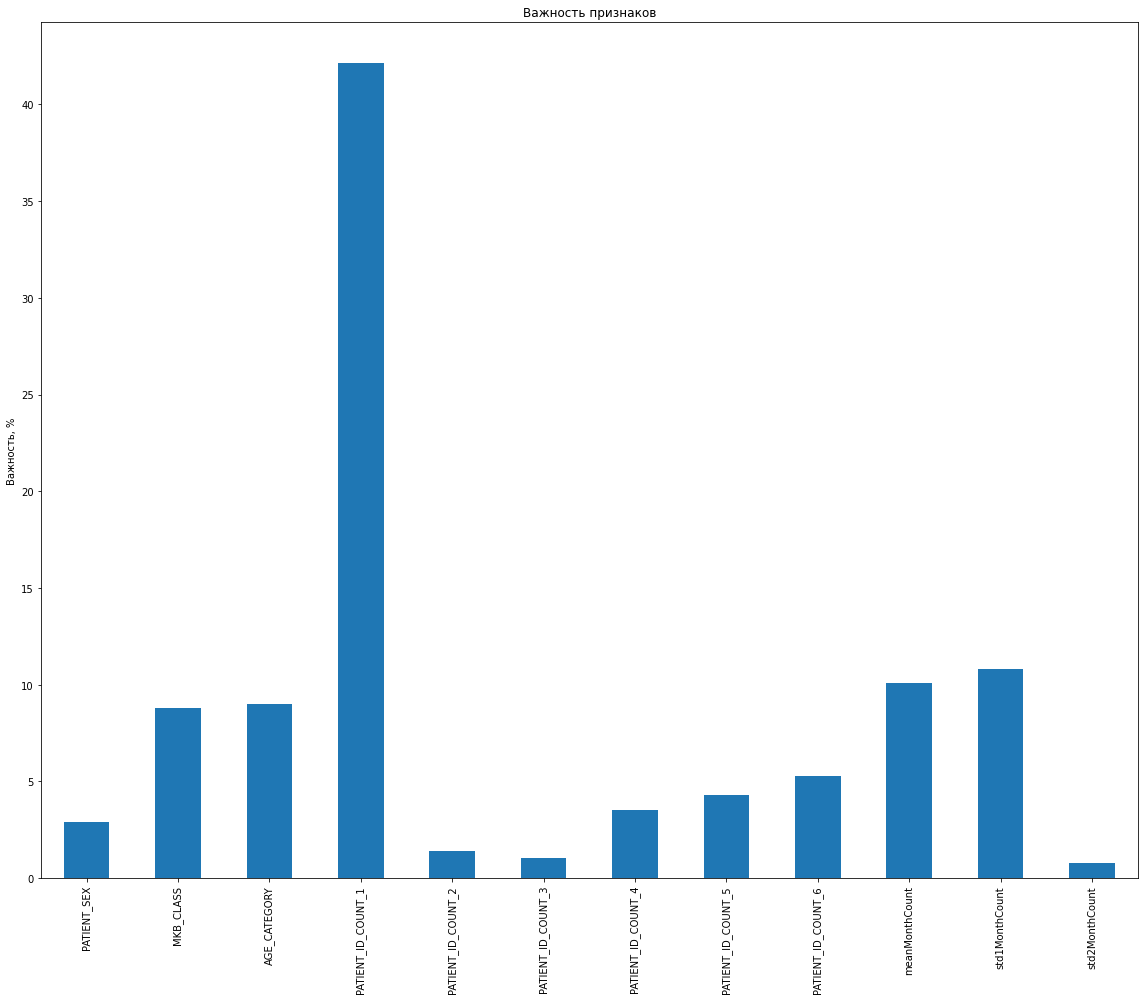

In [182]:
import matplotlib.pyplot as plt
cv1_imp = pd.Series(model_solution.get_feature_importance(),index=X.columns)

fig, ax = plt.subplots(figsize=(16,14))
cv1_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()

In [183]:
Z

,PATIENT_SEX,MKB_CLASS,AGE_CATEGORY,PATIENT_ID_COUNT_1,PATIENT_ID_COUNT_2,PATIENT_ID_COUNT_3,PATIENT_ID_COUNT_4,PATIENT_ID_COUNT_5,PATIENT_ID_COUNT_6,meanMonthCount,std1MonthCount,std2MonthCount
index,,,,,,,,,,,,
0,0,A00-A09,children,4,0,1,0,0,0,0.0,0.0,0.0
1,0,A00-A09,elderly,1,0,0,1,0,0,0.0,0.0,0.0
2,0,A00-A09,middleage,1,0,0,0,0,0,0.0,0.0,0.0
3,0,A00-A09,young,3,0,0,0,0,0,0.0,0.0,0.0
4,0,A00-A09,middleage,0,0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
39368,1,Z80-Z99,elderly,0,0,0,0,0,0,1.0,0.0,0.0
39369,1,Z80-Z99,middleage,0,0,0,1,1,1,0.0,0.0,0.0
39370,1,Z80-Z99,young,0,0,0,0,0,0,0.0,0.0,0.0


In [184]:
#Получение ответов

y_pred_solution = model.predict(pool_test_solution)

In [185]:
#Вот так они выглядят

y_pred1 = y_pred_solution.astype(int)
#y_pred1 = round(y_pred_solution.astype)
y_pred1 = y_pred_solution

In [186]:
for i in range(len(y_pred1)):
  y_pred1[i]=round(y_pred1[i])
  if y_pred1[i]<0:
    y_pred1[i]=0

In [187]:
#Формируем sample_solution для отправки на платформу

test['PATIENT_ID_COUNT'] = y_pred1 #y_pred_solution.astype(int)

In [188]:
#Сохраняем в csv файл
 
test.to_csv('sample_solution.csv', sep=';', index=None)